# 2. Exploratory Data Analysis (EDA)

Let's take a good feeling of our dataset.

## Investigation of structure, quality, and content
Let's first import our training set and take a look at it.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
data_processed = os.getcwd().split('notebooks')[0] + 'data/processed/'

df = pd.read_parquet(data_processed + "train_set.parquet")
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
60046,139248.0,-3.715517,3.153351,-1.633315,-0.562568,-1.648143,-0.275513,-0.875122,2.569385,-0.769234,...,-0.084302,-0.735684,-0.026758,0.725114,0.969274,-0.366202,-0.370026,-0.143750,74.37,0
53243,42073.0,-2.363980,-2.043202,1.336902,1.932621,1.093793,-0.259449,1.421554,-0.799327,0.448279,...,-0.348339,0.439006,1.173461,0.083889,0.081963,-0.291095,-0.387855,-0.262338,228.00,0
117046,79909.0,-1.604373,1.989067,0.446604,-0.410223,-0.091505,-0.538628,0.316316,0.427064,0.172039,...,-0.357060,-0.798541,-0.008807,-0.476844,0.173668,0.142888,0.560774,0.305345,0.99,0
125509,88944.0,1.972473,-0.178795,-1.776622,0.181541,0.454775,-0.672259,0.438232,-0.273791,0.031864,...,0.042185,0.185854,0.063929,0.848570,0.140550,0.612391,-0.118996,-0.072263,49.99,0
212478,129500.0,-1.493437,0.765119,1.320224,3.675145,0.277785,1.157589,0.738019,0.600607,-1.691256,...,0.238457,0.323604,-0.149210,-0.654295,0.914184,0.474024,-0.121307,-0.052083,183.93,0


## 1. Structure Investigation ##

In [3]:
# Show the size of the dataset.
df.shape

(227845, 31)

Our dataset has 227'845 samples and 31 features. Let's see the data types contained in these features.

In [4]:
# Count the number of columsn for each data type.
df.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

We have zero non-numerical entries.

### 1.1 Structure of numerical features
Let's investigate how many unique values each of these features has. We want to uncover the number of binary, ordinal, and continuous variables.

<Axes: title={'center': 'Number of unique values per numerical feature'}>

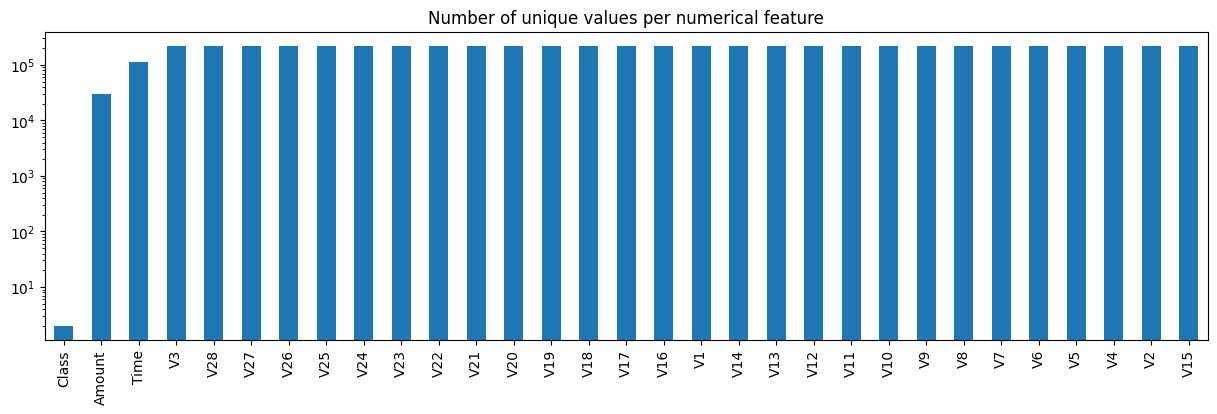

In [5]:
# For each numerical feature, compute the number of unique entries.
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log scale.
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Number of unique values per numerical feature")

We can tell that we are dealing with basically one binary variable, which is our target attribute, and a bunch of continuous variables - at least this is what it looks like.

## 2. Quality Investigation
Our goal now is to get a gist of the dataset regarding duplicates, missing values, and, if applicable, unwanted entries or recording errors.

### 2.1 Duplicates ###


In [6]:
# Check the number of duplicates.
n_duplicates = df.duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your dataset.")

You seem to have 718 duplicates in your dataset.


Let's drop these duplicates.

In [7]:
# Drop duplicates.
df = df.drop_duplicates()
df.shape

(227127, 31)

### 2.2 Missing Values ###
While we are aware that no missing values are present in this dataset, it is worth reviewing techniques that uncover possible holes or gaps in our dataset.

#### 2.2.1 Per sample ####



Text(0, 0.5, 'Sample Number')

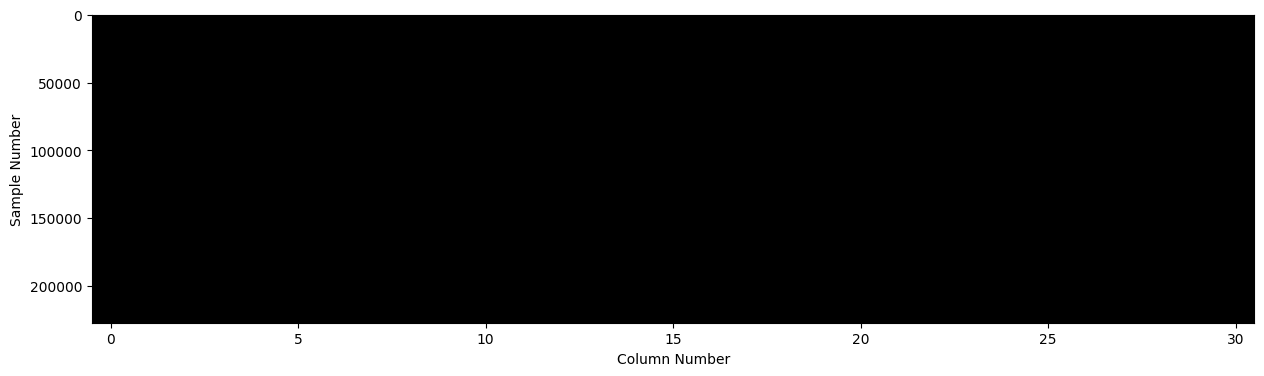

In [8]:
plt.figure(figsize=(15, 4))
plt.imshow(df.isna(), aspect="auto", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

<Axes: >

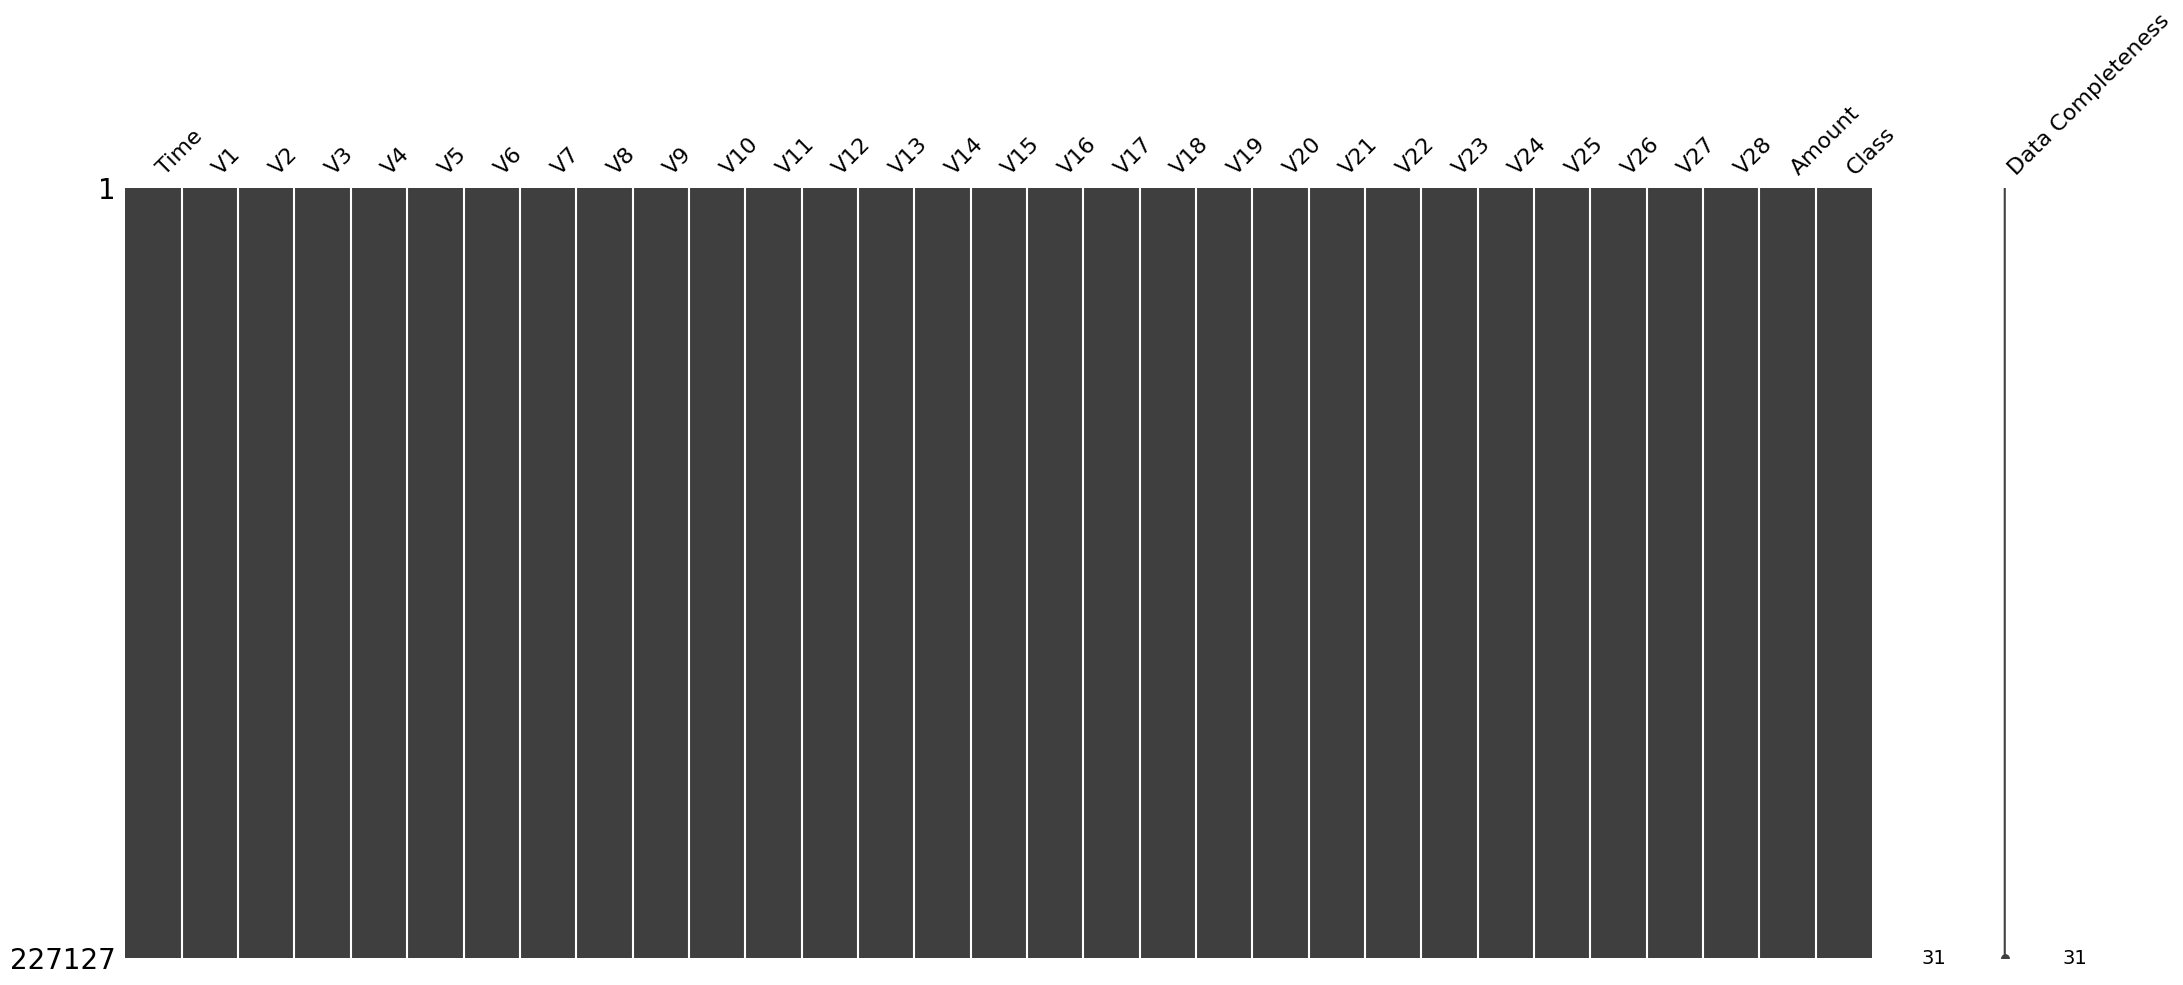

In [9]:
msno.matrix(df, labels=True, sort="descending")

There you go, no missing values. We can see the dataset on its whole with no problem.

### 2.3 Unwanted entries and recording errors ###
Observing unwanted entries, that is, recording errors that shouldn't be registered will be difficult, as we don't know the original column name for each variable. But we can take a look at the numerical features and try to visualize a few observations in which extreme values may hint at something.

#### 2.3.1 Numerical features ####


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

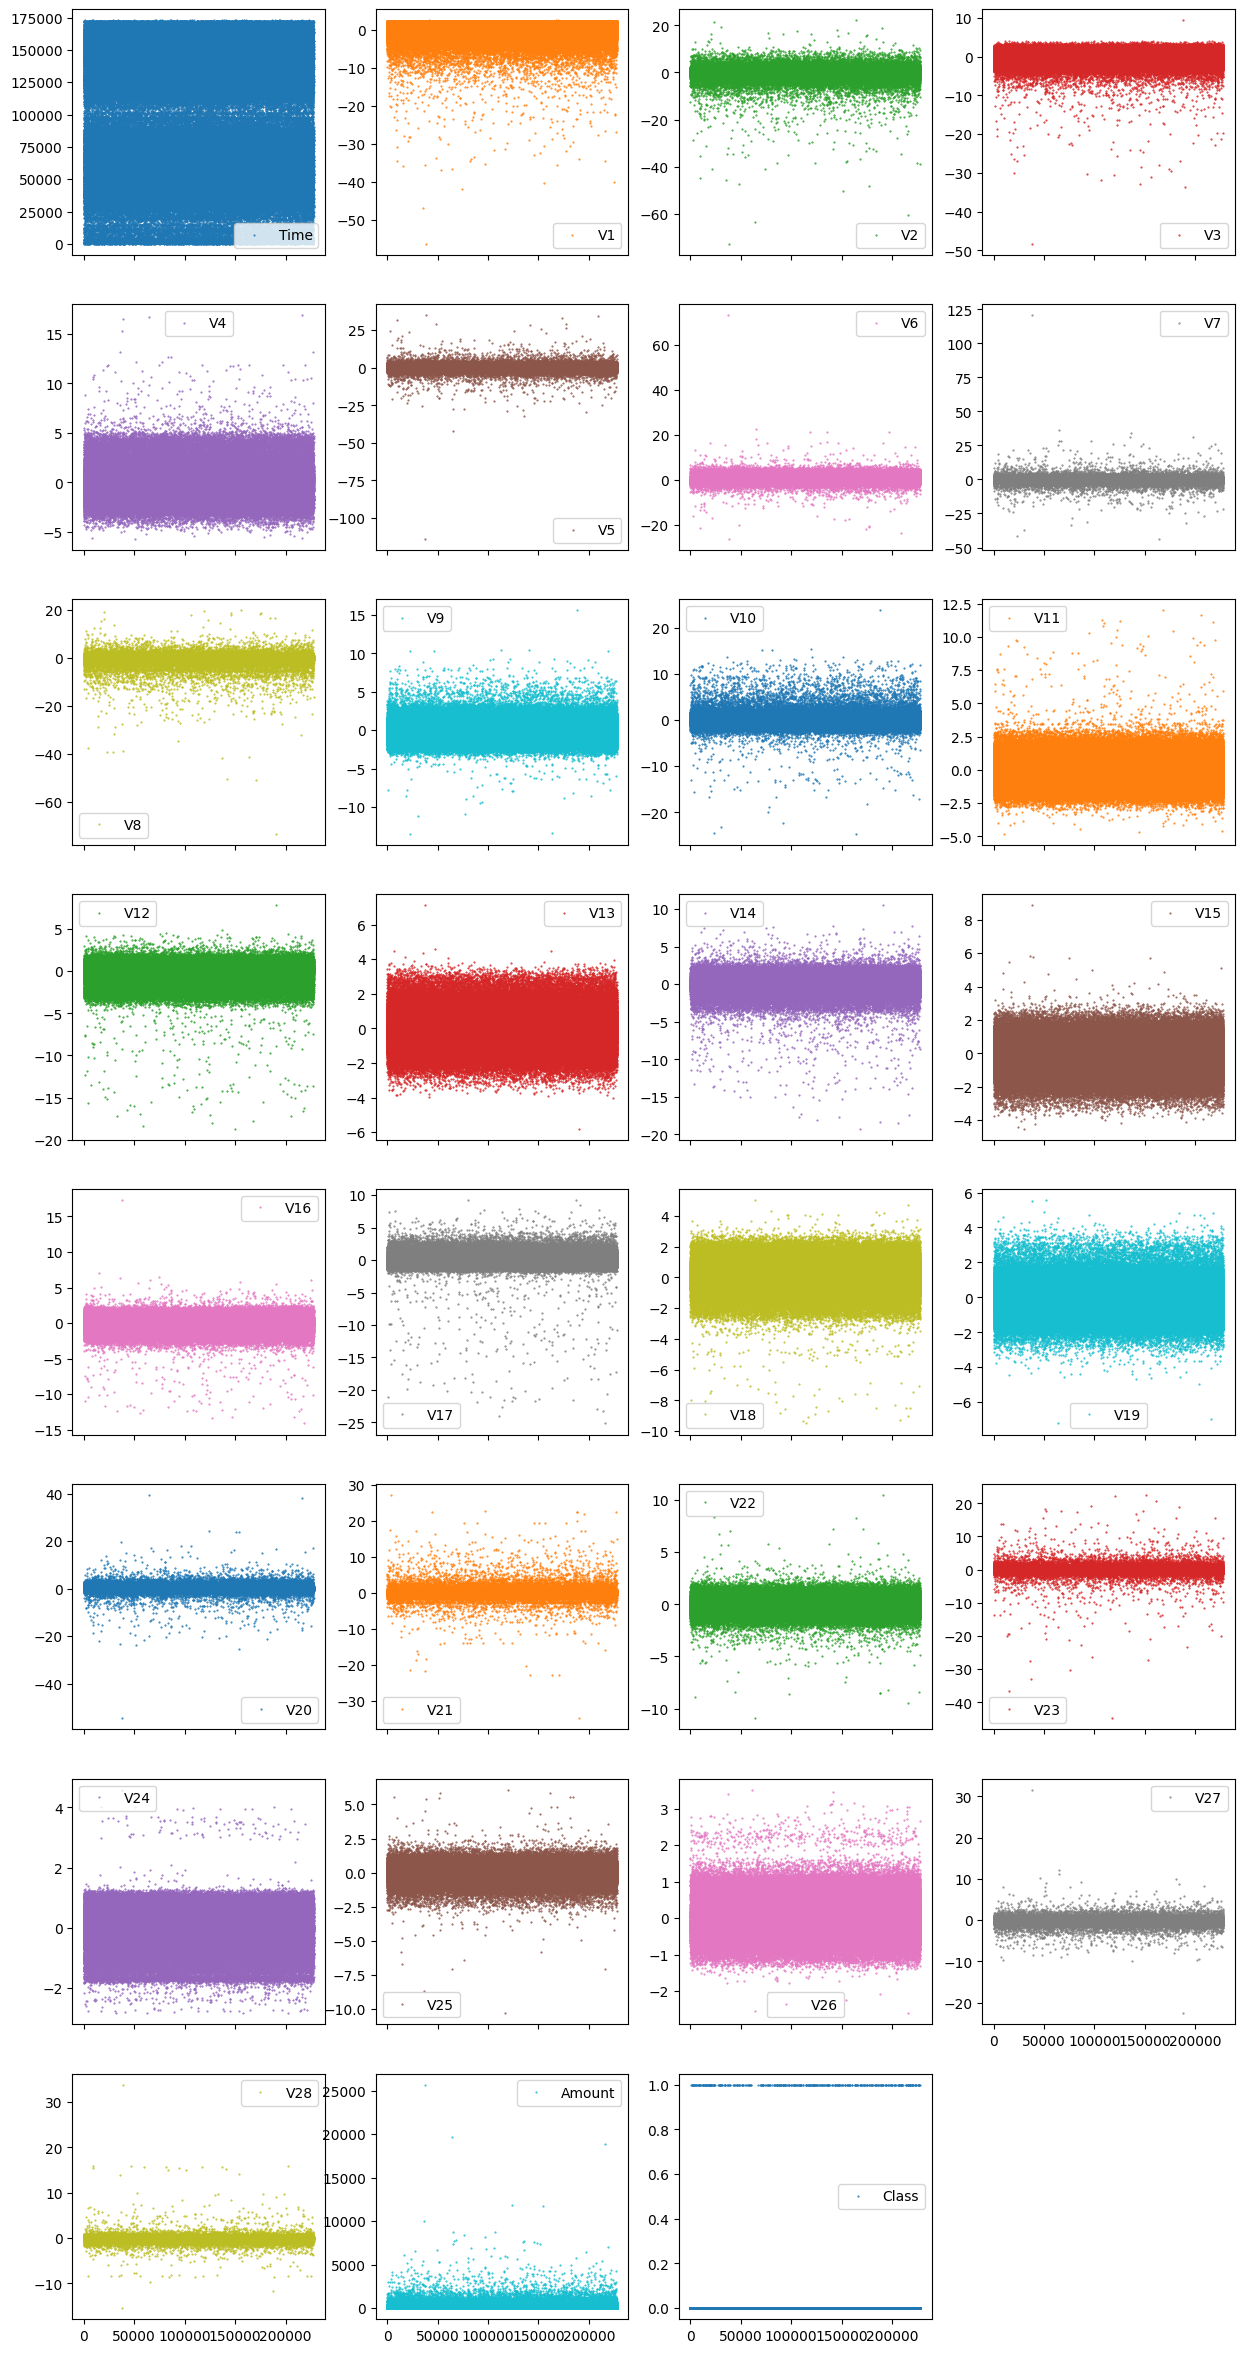

In [10]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), figsize=(15, 30), markersize=1)

Because we are not sure about what each feature represents, we cannot identify any clear error. We can observe a few extreme values in `Amount` which however should not be discarded. 

### 2.3 Conclusion of quality investigation
Overall, our dataset looks good. There are no missing values. We also removed duplicates. Finally, while we couldn't identify any discrepancy right away, we could take a first look at how each feature looks in terms of distribution - some are highly concentrated in a narrower range, while others have more dispersion.

## 3. Content investigation
### 3.1 Feature distribution
Once again, let's take a look at the distribution of each feature.

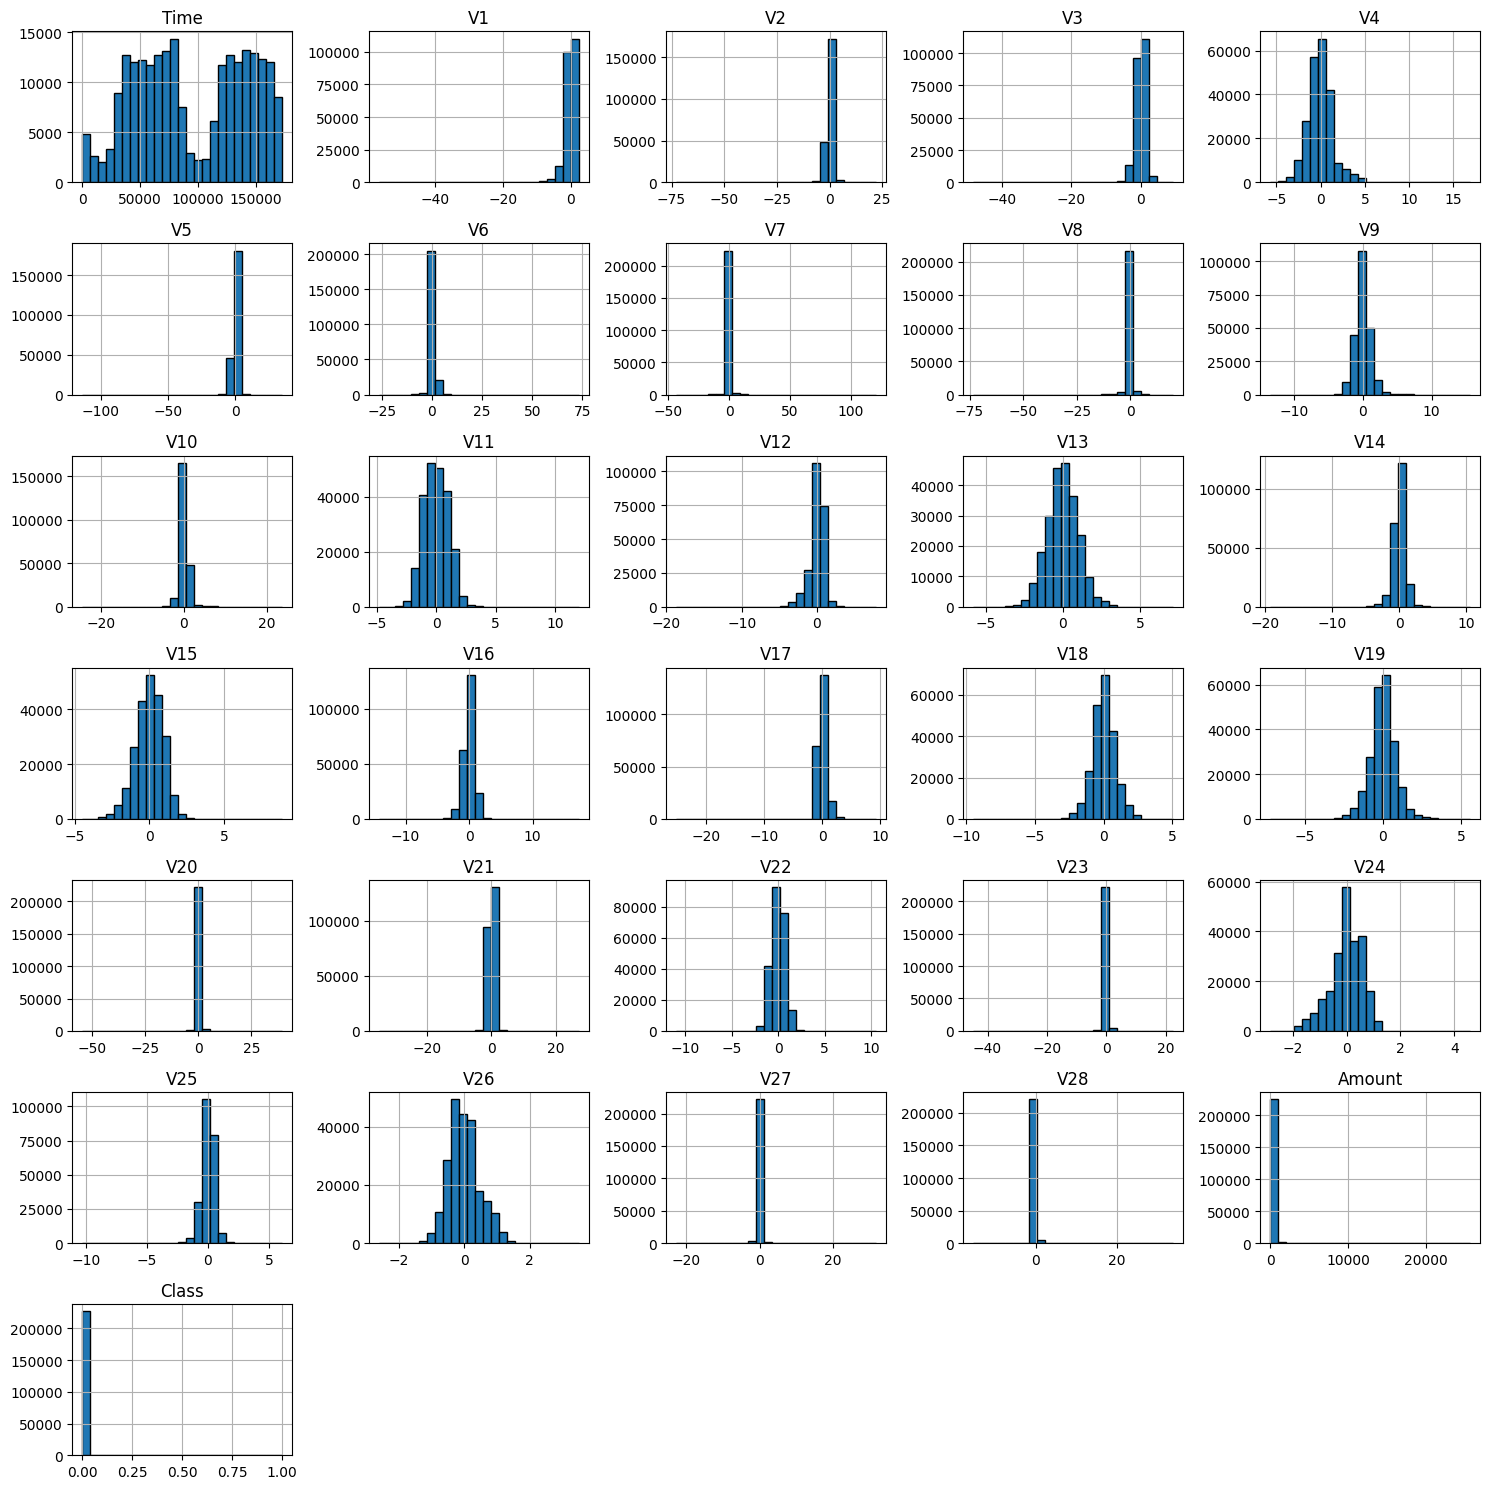

In [12]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 15), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

Based on what we see, some variables present a somewhat normal distribution (such as `V4`, `V11`, and `V15`), containing many different numeric variables. But what about possible categorical variables? While we already know that only `Class` is a categorical field, we can extract the ratio of the most grequent entry for each feature and visualize that info.

Class     0.998314
Amount    0.047669
V16       0.000277
V28       0.000277
V27       0.000277
dtype: float64

<Axes: title={'center': 'Percentage of most frequent entry per feature'}>

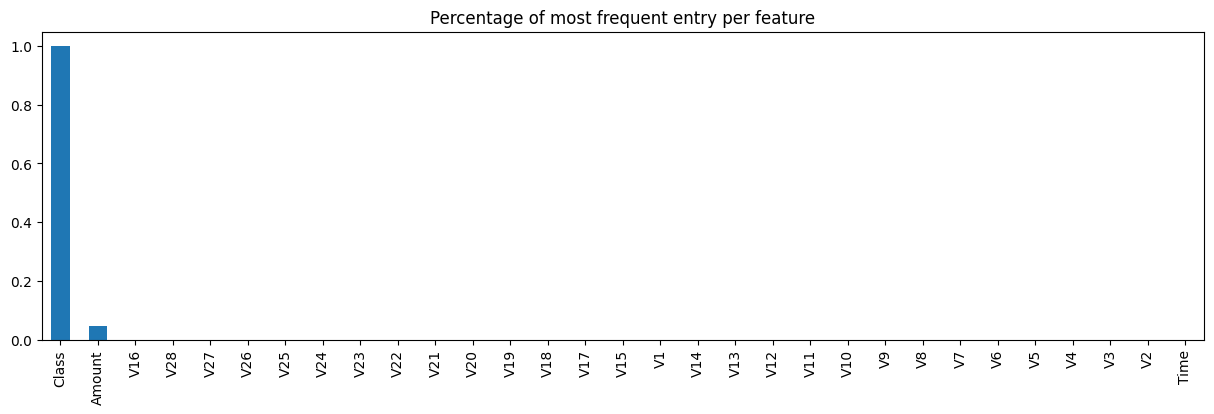

In [13]:
# Collects for each feature the most frequent entry
most_freq_entry = df.mode().iloc[0]

# Checks for each entry if it contains the most frequent entry.
df_freq = df.eq(most_freq_entry.values, axis=1)

# Computes the mean of the `is_most_freq` occurrence for each feature.
df_freq = df_freq.mean().sort_values(ascending=False)

# Display the top 5 features with the highest ratio of singular values.
display(df_freq.head())

# Visualize the `df_freq` table.
df_freq.plot.bar(figsize=(15, 4), title="Percentage of most frequent entry per feature")

We can observe that `Class` indeed is highly skewed but it is a categorical feature. Following, `Amount` counts only with around 5% of the values concentrated as the mode, showing a low degree of skewness. Let's quickly visualize the degree of skewness for our features.

Class     24.290541
Amount    18.191039
V28       10.200208
V7         3.444212
V21        2.910034
V6         1.941147
V10        1.215521
V4         0.682726
V26        0.577895
V9         0.533282
V11        0.345959
V19        0.105488
V13        0.064241
Time      -0.037349
V22       -0.195385
V18       -0.244892
V15       -0.309450
V25       -0.435814
V27       -0.514373
V24       -0.549760
V16       -1.032874
V14       -1.914985
V20       -1.960728
V3        -2.168775
V12       -2.212038
V5        -2.779825
V1        -3.299729
V17       -3.605148
V2        -4.838876
V23       -6.259697
V8        -8.491638
dtype: float64

<Axes: title={'center': 'Skewness per numerical feature'}>

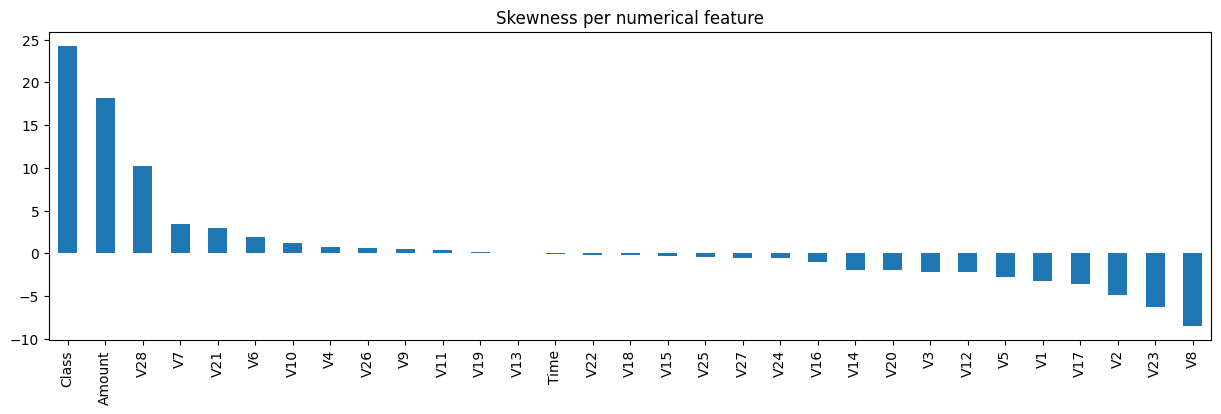

In [24]:
# Measure the degree of skewness for each numerical feature.
skewness = df.skew()
skewness = skewness.sort_values(ascending=False)

# Display the top 5 features with the highest skewness.
display(skewness)

# Visualize the `skewness` table.
skewness.plot.bar(figsize=(15, 4), title="Skewness per numerical feature")

There are some highly skewed features, both to the right and to the left of the mean. Summary:
- `Class` has the highest positive skewness value (24.29), indicating a long tail on the right side of the distribution. This suggests that most transactions are non-fraudulent (assuming `Class` is the feature indicating fraud), with a small number of highly fraudulent transactions.
- `Amount` also has a high positive skewness value (18.19), indicating that most transactions are of a smaller amount, with a few transactions of a very large amount.
- `V28` has a positive skewness value (10.20), indicating a right-skewed distribution.
- `V7` and `V21` have positive skewness values (3.44 and 2.91 respectively), indicating right-skewed distributions, but less extreme than Class, Amount, and V28.
- `V16`, `V14`, `V20`, `V3`, `V12`, `V5`, `V1`, `V17`, `V2`, `V23`, and `V8` have negative skewness values, indicating left-skewed distributions. Among these, `V8` has the most extreme skewness (-8.49), indicating a long tail on the left side of the distribution.
- `Time` has a skewness close to 0 (-0.037), indicating a nearly symmetrical distribution.